In [ ]:
!nvidia-smi

Mon Nov 28 13:44:50 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   46C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!git clone https://github.com/rapidsai/rapidsai-csp-utils.git
!python rapidsai-csp-utils/colab/env-check.py

Cloning into 'rapidsai-csp-utils'...
remote: Enumerating objects: 300, done.
remote: Counting objects: 100% (129/129), done.
remote: Compressing objects: 100% (74/74), done.
remote: Total 300 (delta 74), reused 99 (delta 55), pack-reused 171
Receiving objects: 100% (300/300), 87.58 KiB | 4.87 MiB/s, done.
Resolving deltas: 100% (136/136), done.
Traceback (most recent call last):
  File "rapidsai-csp-utils/colab/env-check.py", line 1, in <module>
    import pynvml
ModuleNotFoundError: No module named 'pynvml'


In [ ]:
!bash rapidsai-csp-utils/colab/update_gcc.sh
import os
os._exit(00)

Updating your Colab environment.  This will restart your kernel.  Don't Panic!
Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease [1,581 B]
Get:4 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:5 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:7 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:8 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Packages [1,038 kB]
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:12 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Get

In [ ]:
import condacolab
condacolab.install()

⏬ Downloading https://github.com/jaimergp/miniforge/releases/latest/download/Mambaforge-colab-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:22
🔁 Restarting kernel...


In [ ]:
import condacolab
condacolab.check()

✨🍰✨ Everything looks OK!


In [ ]:
!python rapidsai-csp-utils/colab/install_rapids.py stable
import os
os.environ['NUMBAPRO_NVVM'] = '/usr/local/cuda/nvvm/lib64/libnvvm.so'
os.environ['NUMBAPRO_LIBDEVICE'] = '/usr/local/cuda/nvvm/libdevice/'
os.environ['CONDA_PREFIX'] = '/usr/local'

Found existing installation: cffi 1.15.1
Uninstalling cffi-1.15.1:
  Successfully uninstalled cffi-1.15.1
Found existing installation: cryptography 37.0.4
Uninstalling cryptography-37.0.4:
  Successfully uninstalled cryptography-37.0.4
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 427.1/427.1 kB 7.6 MB/s eta 0:00:00
Installing RAPIDS Stable 21.12
Starting the RAPIDS install on Colab.  This will take about 15 minutes.
Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - cudatoolkit=11.2
    - dask-sql
    - gcsfs
    - llvmlite
    - openssl
    - python=3.7
    - rapids=21.12


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------

In [ ]:
import cudf
from cuml.ensemble import RandomForestRegressor

In [ ]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
# To upload kaggle .json file
!pip install kaggle
from google.colab import files
files.upload()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"nandakumarl","key":"8907c6fe1b7317b97d4b771f90240a7d"}'}

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# get download the data from kaggle
!kaggle competitions download -c walmart-recruiting-store-sales-forecasting

  0% 0.00/2.70M [00:00<?, ?B/s]
100% 2.70M/2.70M [00:00<00:00, 105MB/s]


In [ ]:
!unzip walmart-recruiting-store-sales-forecasting.zip -d sales

Archive:  walmart-recruiting-store-sales-forecasting.zip
  inflating: sales/features.csv.zip  
  inflating: sales/sampleSubmission.csv.zip  
  inflating: sales/stores.csv        
  inflating: sales/test.csv.zip      
  inflating: sales/train.csv.zip     


In [ ]:
# Unzip and moving all files to sales folder 
!unzip  /content/sales/\*.zip -d sales/

Archive:  /content/sales/features.csv.zip
  inflating: sales/features.csv      

Archive:  /content/sales/test.csv.zip
  inflating: sales/test.csv          

Archive:  /content/sales/sampleSubmission.csv.zip
  inflating: sales/sampleSubmission.csv  

Archive:  /content/sales/train.csv.zip
  inflating: sales/train.csv         

4 archives were successfully processed.


In [ ]:
# To remove  Zip file from sales folder
import os

dir_name = "/content/sales/"
test = os.listdir(dir_name)

for item in test:
    if item.endswith(".zip"):
        os.remove(os.path.join(dir_name, item))

In [ ]:
# To display files in the folder
os.listdir(dir_name)

['stores.csv', 'train.csv', 'sampleSubmission.csv', 'test.csv', 'features.csv']

# Exploratory Data analysis :

In [ ]:
# loading all datasets
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
from tqdm import tqdm

In [ ]:
#Getting stores data
df_store=pd.read_csv("/content/sales/stores.csv")
#Getting features data
df_features=pd.read_csv("/content/sales/features.csv")
# Getting Train and test data
df_train=pd.read_csv("/content/sales/train.csv")
df_test=pd.read_csv("/content/sales/test.csv")


In [ ]:
# Finding out the shape of each dataframes to get the intuition of problem
df_features.shape


(8190, 12)

In [ ]:
# features file have totally 12 columns and 8190 line items lets display 12 columns 
df_features.head(5)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [ ]:
# To get the info of features files and check the corresponding datatypes are correctly taken or not
df_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


### From above data we can infer that for date column datatype was taken as object, We need to convert to date format and then null values (NAN) were found in Markdown1 , markdown2 , Markdown3, Markdown4 , markdown5, CPI and Unemployment data columns  we need to impute the empty cells with values

In [ ]:
df_features.describe()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,8190.000000,8190.000000,8190.000000,4032.000000,2921.000000,3613.000000,3464.000000,4050.000000,7605.000000,7605.000000
mean,23.000000,59.356198,3.405992,7032.371786,3384.176594,1760.100180,3292.935886,4132.216422,172.460809,7.826821
std,12.987966,18.678607,0.431337,9262.747448,8793.583016,11276.462208,6792.329861,13086.690278,39.738346,1.877259
min,1.000000,-7.290000,2.472000,-2781.450000,-265.760000,-179.260000,0.220000,-185.170000,126.064000,3.684000
25%,12.000000,45.902500,3.041000,1577.532500,68.880000,6.600000,304.687500,1440.827500,132.364839,6.634000
50%,23.000000,60.710000,3.513000,4743.580000,364.570000,36.260000,1176.425000,2727.135000,182.764003,7.806000
75%,34.000000,73.880000,3.743000,8923.310000,2153.350000,163.150000,3310.007500,4832.555000,213.932412,8.567000
max,45.000000,101.950000,4.468000,103184.980000,104519.540000,149483.310000,67474.850000,771448.100000,228.976456,14.313000


From the above data, Take aways are mininum value for markdowns columns are in negative value it means that losses occured in some days. 
Mean values can be used for used for impution of empty cells. Required info from above can be used whenever required in upcoming sections

In [ ]:
# Lets repeat all for stores , train and test files
df_store.shape

(45, 3)

In [ ]:
df_store.head(5)

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [ ]:
df_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


In [ ]:
df_store.describe()

,Store,Size
count,45.000000,45.000000
mean,23.000000,130287.600000
std,13.133926,63825.271991
min,1.000000,34875.000000
25%,12.000000,70713.000000
50%,23.000000,126512.000000
75%,34.000000,202307.000000
max,45.000000,219622.000000


** Inference from stores data: Mean value of size is 130287 sqft, min value of size is 34875 sqft and maximum value of size is 219622 sqft

In [ ]:
df_train.shape

(421570, 5)

In [ ]:
df_train.head(5)

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


** Need to change date column to date and time format

In [ ]:
df_train.describe()

,Store,Dept,Weekly_Sales
count,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123
std,12.785297,30.492054,22711.183519
min,1.000000,1.000000,-4988.940000
25%,11.000000,18.000000,2079.650000
50%,22.000000,37.000000,7612.030000
75%,33.000000,74.000000,20205.852500
max,45.000000,99.000000,693099.360000


** There are totally 99 departments in the store and found that weekly sales have some negative value, Totally 421570 rows fields available for training 

In [ ]:
df_test.shape

(115064, 4)

In [ ]:
df_test.head(5)

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115064 entries, 0 to 115063
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Store      115064 non-null  int64 
 1   Dept       115064 non-null  int64 
 2   Date       115064 non-null  object
 3   IsHoliday  115064 non-null  bool  
dtypes: bool(1), int64(2), object(1)
memory usage: 2.7+ MB


In [ ]:
df_test.describe()

,Store,Dept
count,115064.000000,115064.000000
mean,22.238207,44.339524
std,12.809930,30.656410
min,1.000000,1.000000
25%,11.000000,18.000000
50%,22.000000,37.000000
75%,33.000000,74.000000
max,45.000000,99.000000


** Train and test data have equal number of depts which means datas doesnot vary much in training and test

In [ ]:
# lets do EDA in stores data
print("Stores type :")
df_store['Type'].value_counts()

Stores type :


A    22
B    17
C     6
Name: Type, dtype: int64

** Out of 45 stores, 22 Belongs to type A and 17 belongs to type B and 6 belongs to Type C

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

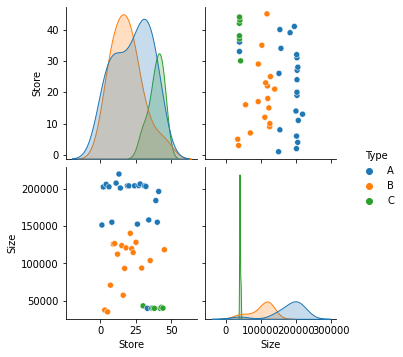

In [ ]:
sns.pairplot(df_store,hue='Type')

Observation: Some type A and type b points are in size area of type C. Lets understand better using box plot


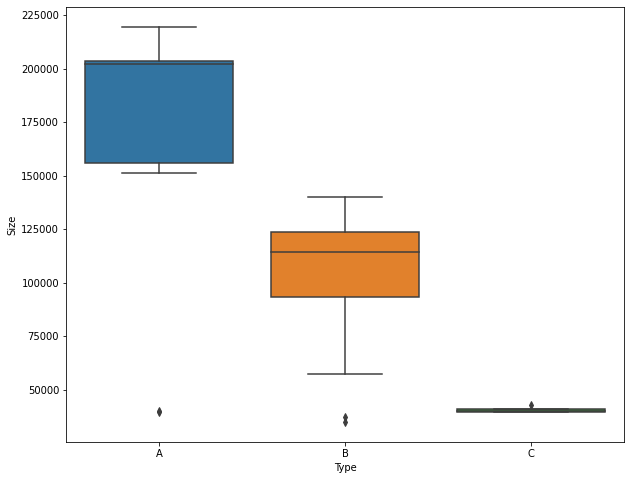

In [ ]:
# Lets find out is there any relationship between type and size using box plot
store_data = pd.concat([df_store['Type'],df_store['Size']],axis=1)
f,ax= plt.subplots(figsize=(10,8))
ax=sns.boxplot(x='Type',y='Size', data=store_data)

Observation:

** 3 types are classified based on the size of the stores
** A types are of higher size stores(greater than 150000sqft) and B type stores are medium size stores(greater than 50000 sqft and less than 150000 sqft) and C types are low size stores(less than 50000 sqft)

In [ ]:
# Lets do EDA for train data
print("Holiday and non holidays:")
df_train['IsHoliday'].value_counts()

Holiday and non holidays:


False    391909
True      29661
Name: IsHoliday, dtype: int64

** Found that about 93% of datas in train set are in non holiday and only 7 % datas are in holiday 

In [ ]:
# cumulative sales on holidays and non holidays
print("Sale on non holiday:" , df_train['Weekly_Sales'][df_train['IsHoliday']==False].sum())
print("Sale on holiday:" , df_train['Weekly_Sales'][df_train['IsHoliday']==True].sum())

Sale on non holiday: 6231919435.55
Sale on holiday: 505299551.56


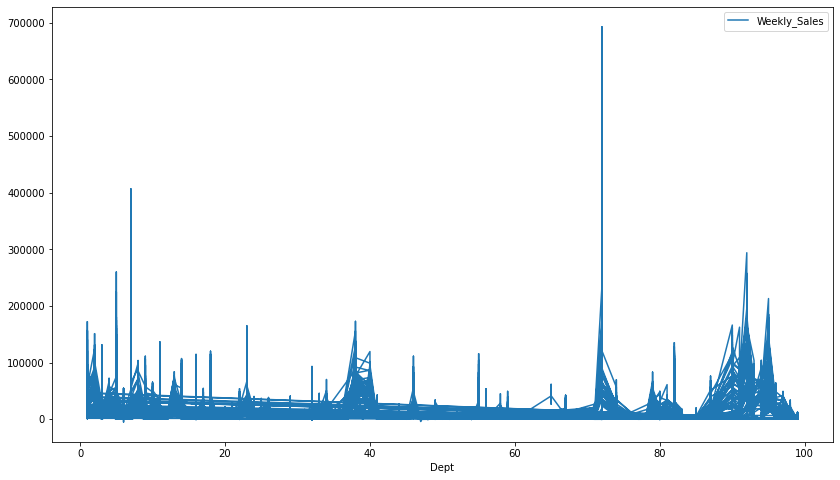

In [ ]:
# lets try dept versus sales
df_train.plot.line(x='Dept',y='Weekly_Sales',alpha=2,figsize=(14,8))

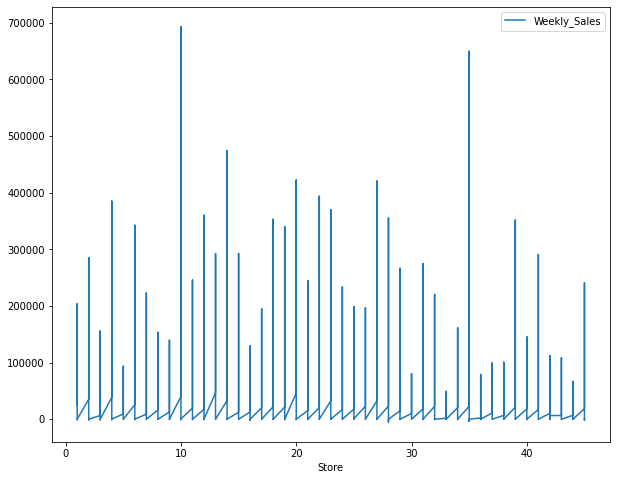

In [ ]:
df_train.plot.line(x='Store',y='Weekly_Sales',alpha=2,figsize=(10,8))

In [ ]:
df_train_dept_top=pd.DataFrame(df_train.groupby('Dept')['Weekly_Sales'].sum())
df_train_dept_top.sort_values(by=['Weekly_Sales'],ascending=False).head(5)

,Weekly_Sales
Dept,
92,4.839433e+08
95,4.493202e+08
38,3.931181e+08
72,3.057252e+08
90,2.910685e+08


Observation:
** In all stores, above table shows the top 5 dept with higher weekly sales value(92,95,38,72,90)

In [ ]:
df_train_Store_top=pd.DataFrame(df_train.groupby('Store')['Weekly_Sales'].sum())
df_train_Store_top.sort_values(by=['Weekly_Sales'],ascending=False).head(5)

,Weekly_Sales
Store,
20,3.013978e+08
4,2.995440e+08
14,2.889999e+08
13,2.865177e+08
2,2.753824e+08


Observation: **  Above table shows the top 5 sales Storewise (20,4,14,13,2)

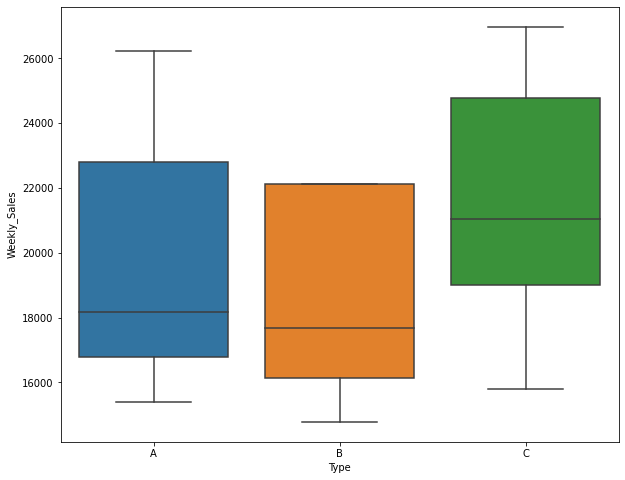

In [ ]:
# Lets find out is there any relationship between type and Sales using box plot
train_data = pd.concat([df_store['Type'],df_train['Weekly_Sales']],axis=1)
f,ax= plt.subplots(figsize=(10,8))
ax=sns.boxplot(x='Type',y='Weekly_Sales', data=train_data,showfliers=False)

Observation:
** Irrespective of type of store, Weekly sales have not changes much 

In [ ]:
# Lets do EDA for test data
print("Holiday and non holidays:")
df_test['IsHoliday'].value_counts()

Holiday and non holidays:


False    106136
True       8928
Name: IsHoliday, dtype: int64

** Found that 92% of datas in test datasets are in Non Holiday and only 8% in Holiday 

In [ ]:
# Lets do EDA for features dataset

df_features.head(5)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [ ]:
print("Holiday and non holidays:")
df_features['IsHoliday'].value_counts()

Holiday and non holidays:


False    7605
True      585
Name: IsHoliday, dtype: int64

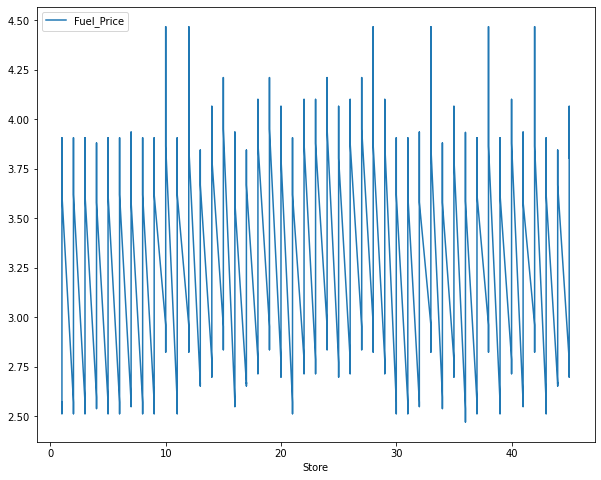

In [ ]:
df_features.plot.line(x='Store',y='Fuel_Price',alpha=2,figsize=(10,8))

** Fuel price and Stores have no impart

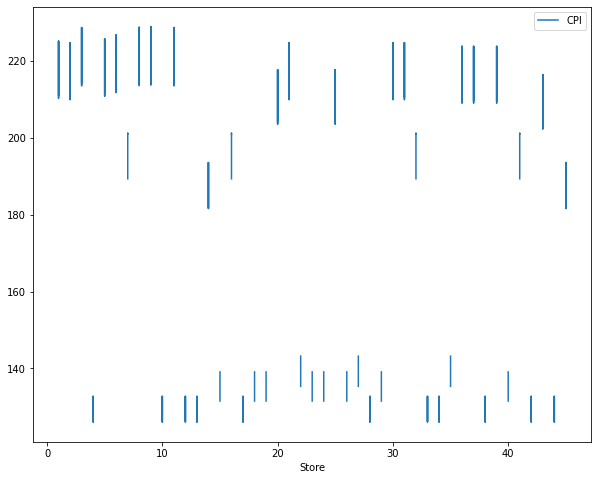

In [ ]:
df_features.plot.line(x='Store',y='CPI',alpha=2,figsize=(10,8))

** Some stores may be located in upper middle class staying area so that customer price index (CPI) was high and vice versa


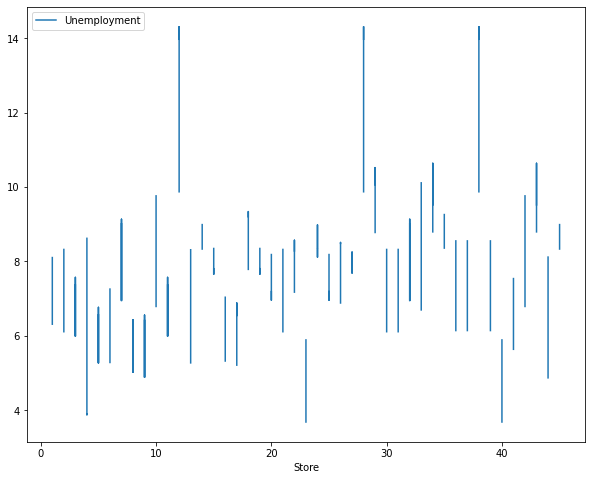

In [ ]:
df_features.plot.line(x='Store',y='Unemployment',alpha=2,figsize=(10,8))

** only three stores have higher unemployement rate ,remaining ranging around mean value

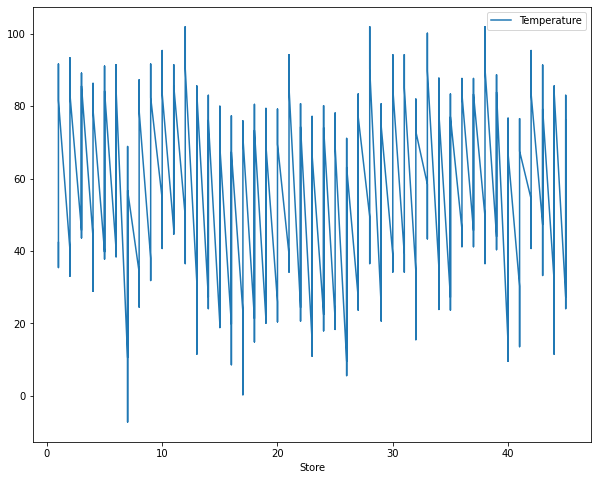

In [ ]:
df_features.plot.line(x='Store',y='Temperature',alpha=2,figsize=(10,8))

No Major interference between stores and temperature


In [ ]:
# Lets do analysis on date features first change it to date format 

df_train['Date']=pd.to_datetime(df_train['Date'])
df_test['Date']=pd.to_datetime(df_test['Date'])
df_features['Date']=pd.to_datetime(df_features['Date'])

In [ ]:
df_train.info()
df_test.info()
df_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  bool          
dtypes: bool(1), datetime64[ns](1), float64(1), int64(2)
memory usage: 13.3 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115064 entries, 0 to 115063
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Store      115064 non-null  int64         
 1   Dept       115064 non-null  int64         
 2   Date       115064 non-null  datetime64[ns]
 3   IsHoliday  115064 non-null  bool          
dtypes: bool(1), datetime64[ns](1), int64(2)
memory usag

In [ ]:
# Lets change true and false to 0 and 1 for better understanding
df_train['IsHoliday']=df_train['IsHoliday'].astype(int)
df_test['IsHoliday']=df_test['IsHoliday'].astype(int)
df_features['IsHoliday']=df_features['IsHoliday'].astype(int)


In [ ]:
#lets change date to day ,month and year field in all datasets
df_train['Day']= pd.DatetimeIndex(df_train['Date']).day
df_train['Month'] = pd.DatetimeIndex(df_train['Date']).month
df_train['Year'] = pd.DatetimeIndex(df_train['Date']).year

In [ ]:
df_test['Day']= pd.DatetimeIndex(df_test['Date']).day
df_test['Month'] = pd.DatetimeIndex(df_test['Date']).month
df_test['Year'] = pd.DatetimeIndex(df_test['Date']).year

In [ ]:
df_features['Day']= pd.DatetimeIndex(df_features['Date']).day
df_features['Month'] = pd.DatetimeIndex(df_features['Date']).month
df_features['Year'] = pd.DatetimeIndex(df_features['Date']).year

In [ ]:
df_train_plot=pd.DataFrame(df_train.groupby(by=['Year'])['Weekly_Sales'].sum())

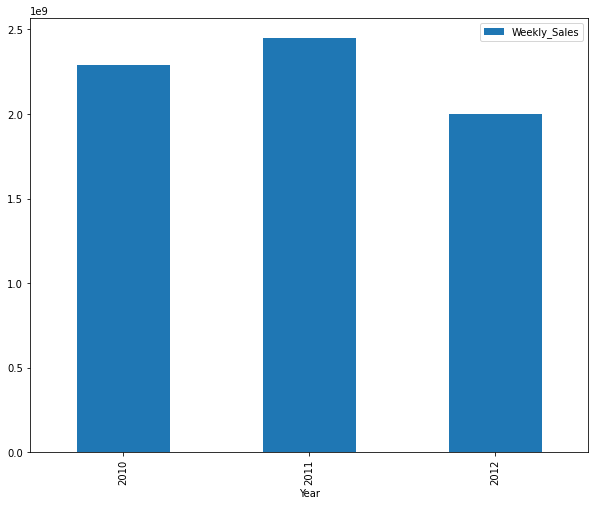

In [ ]:
df_train_plot.plot(kind='bar',figsize=(10,8))

Observation:
** Cumulative sales in every year is almost same (2010 first month is not considered and (2012 last months are not considered)

In [ ]:
df_train_plot=pd.DataFrame(df_train.groupby('Month')['Weekly_Sales'].sum())

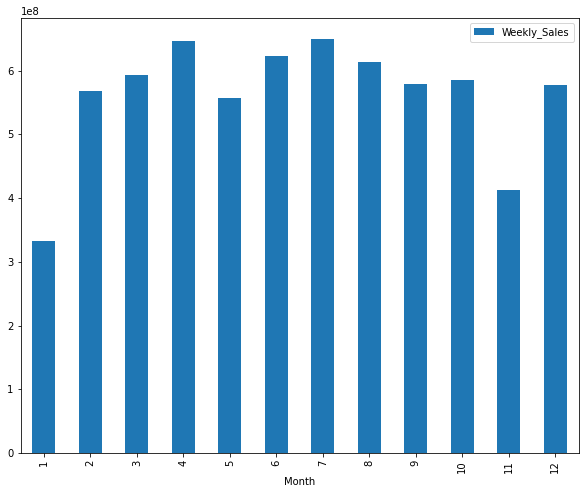

In [ ]:
df_train_plot.plot(kind='bar',figsize=(10,8))

** January and November month sales are low compared to other months

In [ ]:
df_train_plot=pd.DataFrame(df_train.groupby(by=['Year','Month'])['Weekly_Sales'].sum())

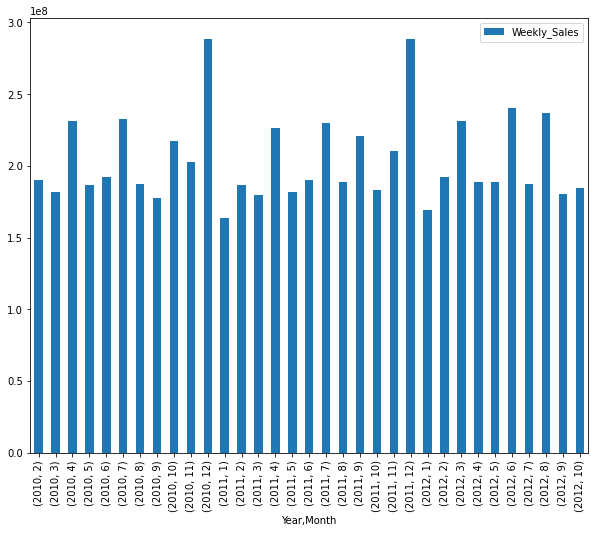

In [ ]:
df_train_plot.plot(kind='bar',figsize=(10,8))

** December month sales in 2010 and 2011 is very high may be due to christmas 
** January month sales in 2011 and 2012 is very low compared to other months

# Adding Additional Features:

In [ ]:
df_train['Week']= pd.DatetimeIndex(df_train['Date']).week
df_train['dayofweek']= pd.DatetimeIndex(df_train['Date']).dayofweek
df_train['Quarter']= pd.DatetimeIndex(df_train['Date']).quarter
df_train['n_days']=(df_train['Date'].dt.date-df_train['Date'].dt.date.min()).apply(lambda x:x.days)

In [ ]:
df_test['Week']= pd.DatetimeIndex(df_test['Date']).week
df_test['dayofweek']= pd.DatetimeIndex(df_test['Date']).dayofweek
df_test['Quarter']= pd.DatetimeIndex(df_test['Date']).quarter
df_test['n_days']=(df_test['Date'].dt.date-df_train['Date'].dt.date.min()).apply(lambda x:x.days)

In [ ]:
df_test.head(30)

,Store,Dept,Date,IsHoliday,Day,Month,Year,Week,dayofweek,Quarter,n_days
0,1,1,2012-11-02,0,2,11,2012,44,4,4,1001
1,1,1,2012-11-09,0,9,11,2012,45,4,4,1008
2,1,1,2012-11-16,0,16,11,2012,46,4,4,1015
3,1,1,2012-11-23,1,23,11,2012,47,4,4,1022
4,1,1,2012-11-30,0,30,11,2012,48,4,4,1029
5,1,1,2012-12-07,0,7,12,2012,49,4,4,1036
6,1,1,2012-12-14,0,14,12,2012,50,4,4,1043
7,1,1,2012-12-21,0,21,12,2012,51,4,4,1050
8,1,1,2012-12-28,1,28,12,2012,52,4,4,1057
9,1,1,2013-01-04,0,4,1,2013,1,4,1,1064


In [ ]:
df_features=df_features.drop(['Day','Month','Year'],axis=1)

In [ ]:
df_features.head(5)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,0
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,1
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,0
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,0
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,0


In [ ]:
# merging dataframes
df_train_with_features= pd.merge(df_train,df_features,how= 'inner',on=['Store','Date','IsHoliday'])
df_test_with_features=pd.merge(df_test,df_features,how='inner',on=['Store','Date','IsHoliday'])

In [ ]:
df_train_with_features.shape

(421570, 21)

In [ ]:
df_train_final=pd.merge(df_train_with_features,df_store,how= 'inner',on=['Store'])
df_test_final=pd.merge(df_test_with_features,df_store,how='inner',on=['Store'])

In [ ]:
df_train_final.tail(5)


,Store,Dept,Date,Weekly_Sales,IsHoliday,Day,Month,Year,Week,dayofweek,...,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
421565,45,93,2012-10-26,2487.80,0,26,10,2012,43,4,...,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221
421566,45,94,2012-10-26,5203.31,0,26,10,2012,43,4,...,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221
421567,45,95,2012-10-26,56017.47,0,26,10,2012,43,4,...,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221
421568,45,97,2012-10-26,6817.48,0,26,10,2012,43,4,...,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221
421569,45,98,2012-10-26,1076.80,0,26,10,2012,43,4,...,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221


In [ ]:
df_test_final.shape

(115064, 22)

In [ ]:
#copying train dataframe if required to access it when required at this stage level
df_train_copy=df_train_final.copy()

In [ ]:
df_train_final.isnull().sum()

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Day                  0
Month                0
Year                 0
Week                 0
dayofweek            0
Quarter              0
n_days               0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
Type                 0
Size                 0
dtype: int64

In [ ]:
df_train_final=df_train_final.fillna(0)
df_test_final=df_test_final.fillna(0)

In [ ]:
df_test_final.isnull().sum()

Store           0
Dept            0
Date            0
IsHoliday       0
Day             0
Month           0
Year            0
Week            0
dayofweek       0
Quarter         0
n_days          0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
Type            0
Size            0
dtype: int64

In [ ]:
# Let only categorical features(Type) to numerical features 
df_train_final['Type']=df_train_final['Type'].replace({'A':1,'B':2,'C':3})
df_test_final['Type']=df_test_final['Type'].replace({'A':1,'B':2,'C':3})

In [ ]:
pip install holidays

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import holidays
us_holidays = holidays.US()
from datetime import timedelta

In [ ]:
for ptr in holidays.US(years=2010).items():
  print(ptr)

(datetime.date(2010, 1, 1), "New Year's Day")
(datetime.date(2010, 12, 31), "New Year's Day (Observed)")
(datetime.date(2010, 1, 18), 'Martin Luther King Jr. Day')
(datetime.date(2010, 2, 15), "Washington's Birthday")
(datetime.date(2010, 5, 31), 'Memorial Day')
(datetime.date(2010, 7, 4), 'Independence Day')
(datetime.date(2010, 7, 5), 'Independence Day (Observed)')
(datetime.date(2010, 9, 6), 'Labor Day')
(datetime.date(2010, 10, 11), 'Columbus Day')
(datetime.date(2010, 11, 11), 'Veterans Day')
(datetime.date(2010, 11, 25), 'Thanksgiving')
(datetime.date(2010, 12, 25), 'Christmas Day')
(datetime.date(2010, 12, 24), 'Christmas Day (Observed)')


In [ ]:
#https://www.geeksforgeeks.org/python-holidays-library/
# below codes are used to count number of US holidays lies in that week
import holidays
us_holidays = holidays.US()
dates=[]
for ptr in holidays.US(years=2010).items():
  dates.append(ptr[0])
for ptr in holidays.US(years=2011).items():
  dates.append(ptr[0])
for ptr in holidays.US(years=2012).items():
  dates.append(ptr[0])
holidays=[]
for index,row in df_train_final.iterrows():
  dat=df_train_final['Date'][index]
  dt=[]
  for i in range(0,5):
    dt.append(dat-timedelta(days=i))
  for i in range(1,3):
    dt.append(dat+timedelta(days=i))
  count=0
  for date in dates:
    if date in dt:
      count+=1
  holidays.append(count)

df_train_final['holidays']=np.array(holidays)  

In [ ]:
df_test_final.tail(5)

,Store,Dept,Date,IsHoliday,Day,Month,Year,Week,dayofweek,Quarter,...,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
115059,45,93,2013-07-26,0,26,7,2013,30,4,3,...,3.804,212.02,851.73,2.06,10.88,1864.57,0.0,0.0,2,118221
115060,45,94,2013-07-26,0,26,7,2013,30,4,3,...,3.804,212.02,851.73,2.06,10.88,1864.57,0.0,0.0,2,118221
115061,45,95,2013-07-26,0,26,7,2013,30,4,3,...,3.804,212.02,851.73,2.06,10.88,1864.57,0.0,0.0,2,118221
115062,45,97,2013-07-26,0,26,7,2013,30,4,3,...,3.804,212.02,851.73,2.06,10.88,1864.57,0.0,0.0,2,118221
115063,45,98,2013-07-26,0,26,7,2013,30,4,3,...,3.804,212.02,851.73,2.06,10.88,1864.57,0.0,0.0,2,118221


In [ ]:
#https://www.geeksforgeeks.org/python-holidays-library/
import holidays
us_holidays = holidays.US()
dates=[]
for ptr in holidays.US(years=2012).items():
  dates.append(ptr[0])
for ptr in holidays.US(years=2013).items():
  dates.append(ptr[0])
holidays=[]
for index,row in df_test_final.iterrows():
  dat=row['Date']
  dt=[]
  for i in range(0,5):
    dt.append(dat-timedelta(days=i))
  for i in range(1,3):
    dt.append(dat+timedelta(days=i))
  count=0
  for date in dates:
    if date in dt:
      count+=1
  holidays.append(count)

df_test_final['holidays']=np.array(holidays)  

In [ ]:
from datetime import datetime

In [ ]:
# Also given that superbowl,laborday,thanksgiving,christmas days so add those into features and see
#For convenience, the four holidays fall within the following weeks in the dataset (not all holidays are in the data):

#Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13
#Labor Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13
#Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13
#Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13
df_train_final['Super_Bowl'] = np.where(
(df_train_final['Date']==datetime(2010,2,12))|
(df_train_final['Date']==datetime(2011,2,11))| 
(df_train_final['Date']==datetime(2012,2,10))|
(df_train_final['Date']==datetime(2013,2,8)), 1, 0)
df_train_final['Labor_day'] = np.where(
(df_train_final['Date'] == datetime(2010,9,10))|
(df_train_final['Date'] == datetime(2011,9,9))| 
(df_train_final['Date'] == datetime(2012,9,7))|
(df_train_final['Date'] == datetime(2013,9,6)), 1, 0)
df_train_final['Thanksgiving'] = np.where(
(df_train_final['Date']==datetime(2010, 11, 26)) |
 (df_train_final['Date']==datetime(2011, 11, 25)) | 
(df_train_final['Date']==datetime(2012, 11, 23))|
(df_train_final['Date']==datetime(2013, 11, 29)),1,0)
df_train_final['Christmas'] = np.where(
(df_train_final['Date']==datetime(2010, 12, 31))| 
(df_train_final['Date']==datetime(2011, 12, 30))| 
(df_train_final['Date']==datetime(2012, 12, 28))|
(df_train_final['Date']==datetime(2013, 12, 27)),1,0)

In [ ]:
df_test_final['Super_Bowl'] = np.where(
(df_test_final['Date']==datetime(2010,2,12))|
(df_test_final['Date']==datetime(2011,2,11))| 
(df_test_final['Date']==datetime(2012,2,10))|
(df_test_final['Date']==datetime(2013,2,8)), 1, 0)
df_test_final['Labor_day'] = np.where(
(df_test_final['Date'] == datetime(2010,9,10))|
(df_test_final['Date'] == datetime(2011,9,9))| 
(df_test_final['Date'] == datetime(2012,9,7))|
(df_test_final['Date'] == datetime(2013,9,6)), 1, 0)
df_test_final['Thanksgiving'] = np.where(
(df_test_final['Date']==datetime(2010, 11, 26)) |
 (df_test_final['Date']==datetime(2011, 11, 25)) | 
(df_test_final['Date']==datetime(2012, 11, 23))|
(df_test_final['Date']==datetime(2013, 11, 29)),1,0)
df_test_final['Christmas'] = np.where(
(df_test_final['Date']==datetime(2010, 12, 31))| 
(df_test_final['Date']==datetime(2011, 12, 30))| 
(df_test_final['Date']==datetime(2012, 12, 28))|
(df_test_final['Date']==datetime(2013, 12, 27)),1,0)

In [ ]:
df_train_final.head(5)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Day,Month,Year,Week,dayofweek,...,MarkDown5,CPI,Unemployment,Type,Size,holidays,Super_Bowl,Labor_day,Thanksgiving,Christmas
0,1,1,2010-02-05,24924.50,0,5,2,2010,5,4,...,0.0,211.096358,8.106,1,151315,0,0,0,0,0
1,1,2,2010-02-05,50605.27,0,5,2,2010,5,4,...,0.0,211.096358,8.106,1,151315,0,0,0,0,0
2,1,3,2010-02-05,13740.12,0,5,2,2010,5,4,...,0.0,211.096358,8.106,1,151315,0,0,0,0,0
3,1,4,2010-02-05,39954.04,0,5,2,2010,5,4,...,0.0,211.096358,8.106,1,151315,0,0,0,0,0
4,1,5,2010-02-05,32229.38,0,5,2,2010,5,4,...,0.0,211.096358,8.106,1,151315,0,0,0,0,0


In [ ]:
df_test_final.head(5)

,Store,Dept,Date,IsHoliday,Day,Month,Year,Week,dayofweek,Quarter,...,MarkDown5,CPI,Unemployment,Type,Size,holidays,Super_Bowl,Labor_day,Thanksgiving,Christmas
0,1,1,2012-11-02,0,2,11,2012,44,4,4,...,2737.42,223.462779,6.573,1,151315,0,0,0,0,0
1,1,2,2012-11-02,0,2,11,2012,44,4,4,...,2737.42,223.462779,6.573,1,151315,0,0,0,0,0
2,1,3,2012-11-02,0,2,11,2012,44,4,4,...,2737.42,223.462779,6.573,1,151315,0,0,0,0,0
3,1,4,2012-11-02,0,2,11,2012,44,4,4,...,2737.42,223.462779,6.573,1,151315,0,0,0,0,0
4,1,5,2012-11-02,0,2,11,2012,44,4,4,...,2737.42,223.462779,6.573,1,151315,0,0,0,0,0


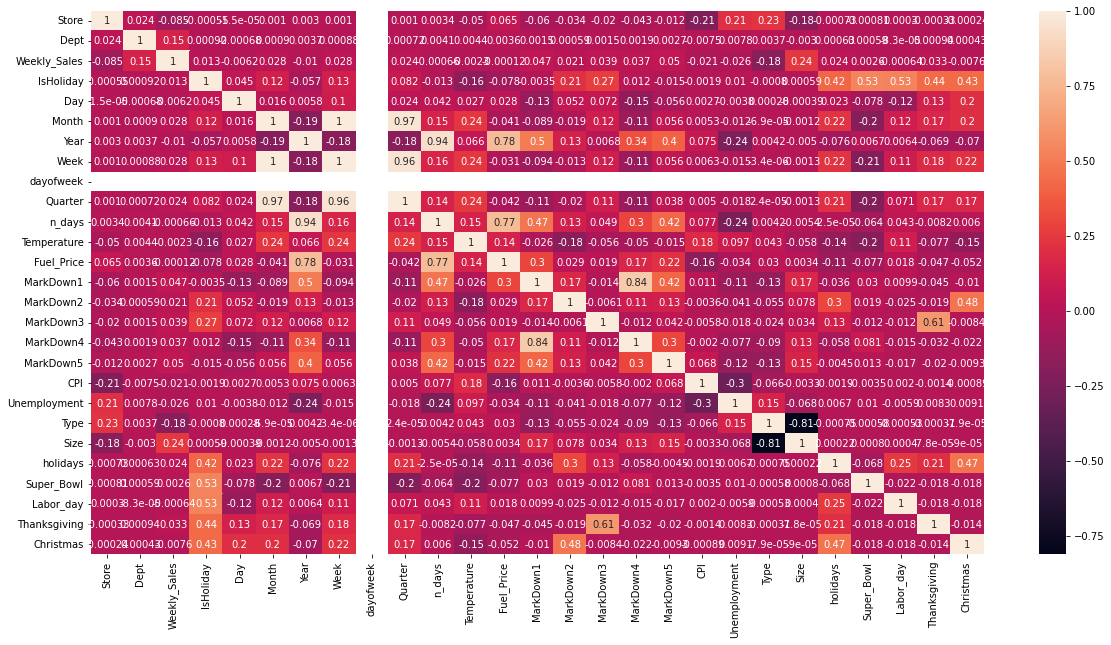

In [ ]:
# lets found out the correlation between features
#https://www.analyticsvidhya.com/blog/2020/10/feature-selection-techniques-in-machine-learning/

cor =df_train_final.corr()

plt.figure(figsize=(20,10))
sns.heatmap(cor,annot= True)

After So much of trail , Below features dropped in final dataframe to train and test
 Quarter, Fuel_price, Markdown1,Markdown2,markdown3,markdown4,markdown5,CPI,Unemployment,n_days, Superbowl,laborday,thanksgiving,laborday and dayofweek 

In [ ]:
df_train_final=df_train_final.drop(['Month','Quarter','Fuel_Price','MarkDown1','MarkDown2','dayofweek','MarkDown3','MarkDown4','MarkDown5','Type'],axis=1)

In [ ]:
df_test_final=df_test_final.drop(['Month','Quarter','Fuel_Price','MarkDown1','MarkDown2','dayofweek','MarkDown3','MarkDown4','MarkDown5','Type'],axis=1)

In [ ]:
df_train_final.set_index('Date', inplace=True)
df_test_final.set_index('Date', inplace=True)


In [ ]:
df_train_final=df_train_final.sort_index()
df_test_final=df_test_final.sort_index()

In [ ]:
df_train_final.to_csv("train_final.csv")
df_test_final.to_csv("test_final.csv")

In [ ]:
from google.colab import files
files.download('train_final.csv') 

In [ ]:
from google.colab import files
files.download('test_final.csv') 

In [1]:
!gdown --id 1jktx8dpeUCvi6Y2hxrWVreHNB245ZGFE
!gdown --id 1sDLyMdoRvgnMePIEcSW-jtBagAAQU0LV

/usr/local/lib/python3.8/dist-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1jktx8dpeUCvi6Y2hxrWVreHNB245ZGFE
To: /content/test_final.csv
100% 6.22M/6.22M [00:00<00:00, 25.0MB/s]
/usr/local/lib/python3.8/dist-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1sDLyMdoRvgnMePIEcSW-jtBagAAQU0LV
To: /content/train_final.csv
100% 26.5M/26.5M [00:00<00:00, 66.5MB/s]


In [2]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
df_train_final=pd.read_csv("train_final.csv")
df_test_final=pd.read_csv("test_final.csv")

In [4]:
df_train_final.set_index('Date', inplace=True)
df_test_final.set_index('Date', inplace=True)


In [5]:
# Changing negative weekly sales to zero since sales cannot be zero
df_train_final[df_train_final['Weekly_Sales']<0]=0

In [6]:
# lets train up the model with available features and see the preformance
X=df_train_final.drop(['Weekly_Sales'],axis=1)
y=df_train_final['Weekly_Sales']

In [7]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor     
from sklearn.ensemble import RandomForestRegressor 
from sklearn.svm import LinearSVR 
import xgboost as xgb
from xgboost.sklearn import XGBRegressor

In [8]:
#https://medium.com/@Stan_DS/timeseries-split-with-sklearn-tips-8162c83612b9
from sklearn.model_selection import TimeSeriesSplit

tss = TimeSeriesSplit(n_splits = 3)

In [9]:
for train_index, test_index in tss.split(X):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index,:]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

In [10]:
X_train.index

Index(['2010-02-05', '2010-02-05', '2010-02-05', '2010-02-05', '2010-02-05',
       '2010-02-05', '2010-02-05', '2010-02-05', '2010-02-05', '2010-02-05',
       ...
       '2012-02-24', '2012-02-24', '2012-02-24', '2012-02-24', '2012-02-24',
       '2012-02-24', '2012-02-24', '2012-02-24', '2012-02-24', '2012-02-24'],
      dtype='object', name='Date', length=316178)

In [11]:
X_test.index

Index(['2012-02-24', '2012-02-24', '2012-02-24', '2012-02-24', '2012-02-24',
       '2012-02-24', '2012-02-24', '2012-02-24', '2012-02-24', '2012-02-24',
       ...
       '2012-10-26', '2012-10-26', '2012-10-26', '2012-10-26', '2012-10-26',
       '2012-10-26', '2012-10-26', '2012-10-26', '2012-10-26', '2012-10-26'],
      dtype='object', name='Date', length=105392)

In [12]:
print("X_train_shape:",X_train.shape)
print("X_test_shape:",X_test.shape)
print("Y_train_shape:",y_train.shape)
print("Y_test_shape:",y_test.shape)

X_train_shape: (316178, 12)
X_test_shape: (105392, 12)
Y_train_shape: (316178,)
Y_test_shape: (105392,)


In [13]:
def calculateWMAE_test(actual,predicted,X_test):
    '''This function is used to calculate WMAE'''
    weights=X_test['IsHoliday'].apply(lambda IsHoliday:5 if IsHoliday else 1)
    WMAE= np.sum(np.abs(actual-predicted)*weights,axis=0)/np.sum(weights)
    return WMAE

In [14]:
def calculateWMAE_train(actual,predicted,X_train):
    '''This function is used to calculate WMAE'''
    weights=X_train['IsHoliday'].apply(lambda IsHoliday:5 if IsHoliday else 1)
    WMAE= np.sum(np.abs(actual-predicted)*weights,axis=0)/np.sum(weights)
    return WMAE

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
# Model 1:
#Linear regression
lr = LinearRegression(normalize=True)
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
y_pred_train=lr.predict(X_train)
WMAE_test=calculateWMAE_test(y_test,y_pred,X_test)
WMAE_train=calculateWMAE_train(y_train,y_pred_train,X_train)
print("WMAE train:",WMAE_train)
print("WMAE test:",WMAE_test)

WMAE train: 14880.837770865655
WMAE test: 14537.226843287901


In [17]:
#Support vector regressor
svr = LinearSVR()
svr.fit(X_train,y_train)
y_pred = svr.predict(X_test)
y_pred_train=svr.predict(X_train)
WMAE_test=calculateWMAE_test(y_test,y_pred,X_test)
WMAE_train=calculateWMAE_train(y_train,y_pred_train,X_train)
print("WMAE train:",WMAE_train)
print("WMAE test:",WMAE_test)

WMAE train: 15476.357827132693
WMAE test: 19505.921633608905


In [18]:
from sklearn.tree import DecisionTreeRegressor

In [19]:
#Decision tree
WMAE_test=[]
WMAE_train=[]
hyperparameters=[]
max_depth=[1,2,5,10,11,12,13,14,15,20,25,30]
for i in tqdm(max_depth):
  model=DecisionTreeRegressor(max_depth=i)
  model.fit(X_train,y_train)
  y_pred=model.predict(X_test)
  y_pred_train=model.predict(X_train)
  WMAE_test.append(calculateWMAE_test(y_test,y_pred,X_test))
  WMAE_train.append(calculateWMAE_train(y_train,y_pred_train,X_train))
  hyperparameters.append({'Maximum Depth': i})


100%|██████████| 12/12 [00:27<00:00,  2.30s/it]


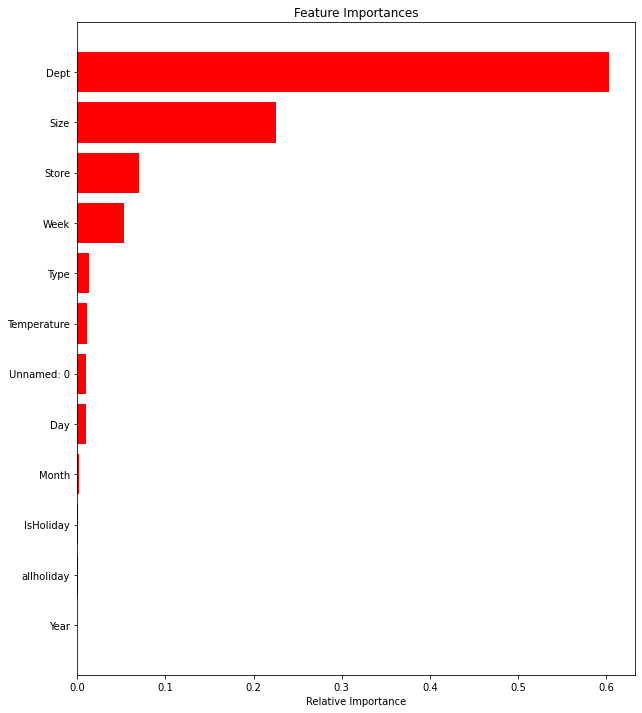

In [20]:
features = X_train.columns
importances = model.feature_importances_ 
indices = (np.argsort(importances))[-20:]
plt.figure(figsize=(10,12)) 
plt.title('Feature Importances') 
plt.barh(range(len(indices)), importances[indices], color='r', align='center') 
plt.yticks(range(len(indices)), [features[i] for i in indices]) 
plt.xlabel('Relative Importance')
plt.show()


In [21]:
Model_df=pd.DataFrame(hyperparameters)
Model_df['Train error']=WMAE_train
Model_df['Test error']=WMAE_test
Model_df.sort_values(by=['Test error'],ascending=True)
Model_df.head(10)

,Maximum Depth,Train error,Test error
0,1,14346.085713,14092.321560
1,2,13183.925697,12925.046447
2,5,8872.639732,8354.395029
3,10,4590.425788,4293.791489
4,11,3918.776217,3807.782592
5,12,3345.405981,3401.570443
6,13,2753.630796,3021.265149
7,14,2326.532124,2732.881394
8,15,1901.014177,2449.827436
9,20,584.918317,2192.655790


# Hyperparameter tuning carried out in seperate sheet since GPU contrainst

In [22]:
model3=RandomForestRegressor()
model3.fit(X_train,y_train)
y_pred_=model3.predict(X_test)
y_pred_train=model3.predict(X_train)
WMAE_test=calculateWMAE_test(y_test,y_pred_,X_test)
WMAE_train=calculateWMAE_train(y_train,y_pred_train,X_train)
print("WMAE train:",WMAE_train)
print("WMAE test:",WMAE_test)

WMAE train: 562.5600574386775
WMAE test: 1822.9170761789796


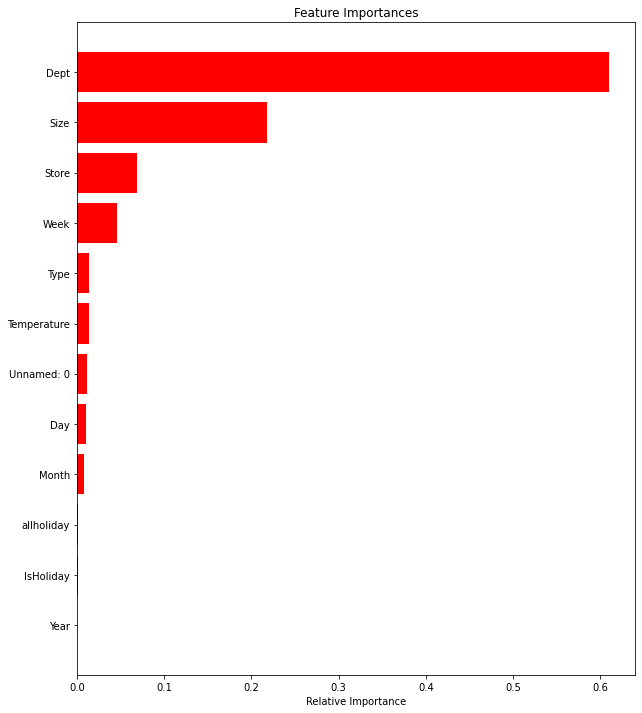

In [23]:
features = X_train.columns
importances = model3.feature_importances_ 
indices = (np.argsort(importances))[-20:]
plt.figure(figsize=(10,12)) 
plt.title('Feature Importances') 
plt.barh(range(len(indices)), importances[indices], color='r', align='center') 
plt.yticks(range(len(indices)), [features[i] for i in indices]) 
plt.xlabel('Relative Importance')
plt.show()


In [ ]:
model3=RandomForestRegressor()
model3.fit(X,y)
y_pred_rf=model3.predict(df_test_final)


In [ ]:
#XGBoost hyper-parameter tuning
def hyperParameterTuning(X_train, y_train):
    param_tuning = {
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5, 7,10,12,15,20,25],
        'subsample': [0.5, 0.7],
        'colsample_bytree': [0.5, 0.7],
        'n_estimators' : [10,50,80,100,150,200],
        'objective': ['reg:absoluteerror']
    }

    xgb_model = XGBRegressor()

    gsearch = GridSearchCV(estimator = xgb_model,
                           param_grid = param_tuning,                      
                           cv = 5,verbose=10)

    gsearch.fit(X_train,y_train)
    return gsearch.best_params_

In [ ]:
hyperParameterTuning(X,y)

In [24]:
model4=XGBRegressor(n_estimators=200,colsample_bytree=0.7,learning_rate=0.1,max_depth=10,subsample=0.7)
model4.fit(X_train,y_train)
y_pred_=model4.predict(X_test)
y_pred_train=model4.predict(X_train)
WMAE_test=calculateWMAE_test(y_test,y_pred_,X_test)
WMAE_train=calculateWMAE_train(y_train,y_pred_train,X_train)
print("WMAE train:",WMAE_train)
print("WMAE test:",WMAE_test)

[15:26:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
WMAE train: 1714.6493810392622
WMAE test: 4063.1974333263374


# Hyperparameter tuning carried out in seperate sheet since GPU contrainst

In [ ]:
model4=XGBRegressor(n_estimators=200,colsample_bytree=0.7,learning_rate=0.1,max_depth=10,subsample=0.7)
model4.fit(X,y)
y_pred_rf=model4.predict(df_test_final)

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor

In [ ]:
model5=ExtraTreesRegressor(n_estimators=100,max_depth=25)
model5.fit(X,y)
y_pred_rf=model5.predict(df_test_final)

In [ ]:
import pickle

In [ ]:
with open('ETHT-final.pkl', 'wb') as f:
    pickle.dump(model5, f)


In [ ]:
with open('ETHT-final.pkl', 'rb') as f:
    rf = pickle.load(f)

In [ ]:
y_pred_rf=rf.predict(df_test_final)

In [ ]:
#https://stackoverflow.com/questions/52411992/how-to-produce-a-kaggle-submission-csv-file-with-specific-entries
import pandas as pd
submission = pd.DataFrame({
        "Id": df_test_final.Store.astype(str)+'_'+df_test_final.Dept.astype(str)+'_'+df_test_final.index.astype(str),
        "Weekly_Sales": y_pred_rf
    })

submission.to_csv('submission_predicted.csv', index=False)

# Score: RandomForestRegressor
     ** Without hyperparamter tuning
     ** With Minmaxscalar of features like CPI,Unemployment,Fuel price, Temperature,Size
     ** With drop of correlated features(Week, type,Quarter, markdown1,dayof week and Fuel price)

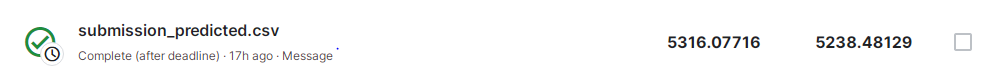

# Score: RandomForestRegressor
     ** Without hyperparamter tuning
     ** Without Minmaxscalar of features like CPI,Unemployment,Fuel price, Temperature,Size
     ** With drop of correlated features(Week, type,Quarter, markdown1,dayof week and Fuel price)

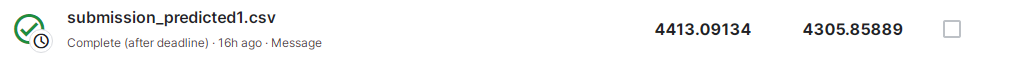

# Score: RandomForestRegressor
     ** Without hyperparamter tuning
     ** Without Minmaxscalar of features like CPI,Unemployment,Fuel price, Temperature,Size
     ** Without drop of correlated features(Week, type,Quarter, markdown1,dayof week and Fuel price)

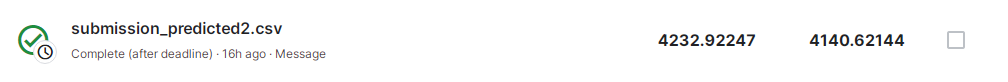

# Score: XGBRegressor
     ** With hyperparamter tuning
     ** Without Minmaxscalar of features like CPI,Unemployment,Fuel price, Temperature,Size
     ** Without drop of correlated features(Week, type,Quarter, markdown1,dayof week and Fuel price)

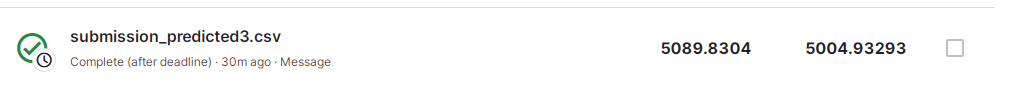

# Score: RandomForestRegressor
     ** With hyperparamter tuning
     ** Without Minmaxscalar of features like CPI,Unemployment,Fuel price, Temperature,Size
     ** Without drop of correlated features(Week, type,Quarter, markdown1,dayof week and Fuel price)

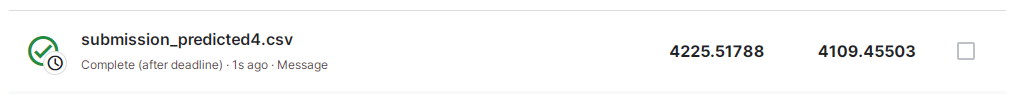

# Score: XgbRegressor
     ** With hyperparamter tuning
     ** Without Minmaxscalar of features like CPI,Unemployment,Fuel price, Temperature,Size
     ** With drop of correlated features(Week, type,Quarter, markdown1,dayof week and Fuel price)

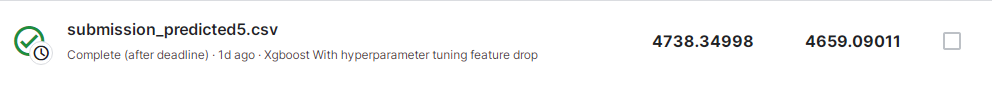

# Score: RandomForestRegressor
     ** With hyperparamter tuning(n_estimators=120,min_samples_split=10,min_leaf=1,max_depth=40)
     ** Without Minmaxscalar of features like CPI,Unemployment,Fuel price, Temperature,Size
     ** With drop of features(Quarter, markdown1,Markdown2,markdown3,markdown4, markdown5,dayofweek) and change temperature , unemployment, CPI and fuel price into mean value and drop the actual value

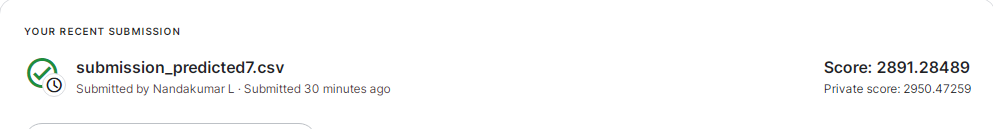

# Score: RandomForestRegressor (Averaging to two RF)
     ** With hyperparamter tuning (n_estimators=120,min_samples_split=10,min_leaf=1,max_depth=40) & max depth =35
     ** Without Minmaxscalar of features like CPI,Unemployment,Fuel price, Temperature,Size
     ** With drop of features(Quarter, markdown1,Markdown2,markdown3,markdown4, markdown5,dayofweek) and change temperature , unemployment, CPI and fuel price into mean value and drop the actual value

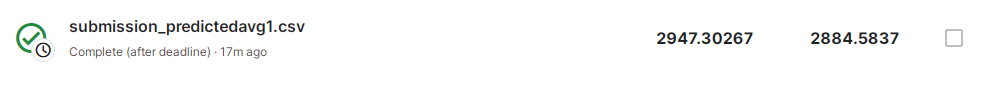

# Score: RandomForestRegressor
     ** With hyperparamter tuning (n_estimators=100 & max depth =30)
  
     ** Adding holiday features

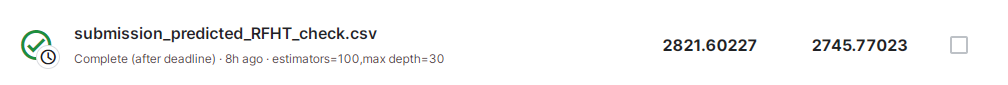

# Score: Extra Tree Regressor
     ** With hyperparamter tuning (n_estimators=100 & max depth =25)
  
     ** Adding holiday features

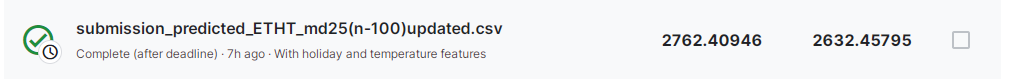